# STEP 0: INITIALIZATION AND GPU AVAILABILITY VERIFICATION

In [1]:
import os

inputPath = os.getcwd()
os.chdir(inputPath)
print(inputPath)

D:\Pablo_Quesada\Jupyter Notebook\CMME 2021\Project CMME


In [2]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12848944704359677962
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23137324237
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2082601875804036707
physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:0b:00.0, compute capability: 8.6"
]


# STEP 1 : LOAD THE IMAGES AND LABELS (GROUND-TRUTH VALUES)

In [3]:
from pyimagesearch import datasets
res=512 # Select resolution of images

#----------------------------------3878 POLYSILICON MICROSTRUCTURE IMAGES-------------------------------------

inputPathtemp = inputPath+'\\1k'
os.chdir(inputPathtemp)
# load the original 2x2 RVE images
original_images_2x2_1k = datasets.load_RVE_original_images(inputPathtemp,[2],res,999)/255

inputPathtemp = inputPath+'\\2k'
os.chdir(inputPathtemp)
# load the original 2x2 RVE images
original_images_2x2_2k = datasets.load_RVE_original_images(inputPathtemp,[2],res,999)/255

inputPathtemp = inputPath+'\\3k'
os.chdir(inputPathtemp)
# load the original 2x2 RVE images
original_images_2x2_3k = datasets.load_RVE_original_images(inputPathtemp,[2],res,999)/255

inputPathtemp = inputPath+'\\4k'
os.chdir(inputPathtemp)
# load the original 2x2 RVE images
original_images_2x2_4k = datasets.load_RVE_original_images(inputPathtemp,[2],res,999)/255


#-----------------------------------------------------3878 LABELS----------------------------------------------

df1=datasets.load_RVE_labels_displ(inputPath+'\\1k',[2])
df2=datasets.load_RVE_labels_displ(inputPath+'\\2k',[2])
df3=datasets.load_RVE_labels_displ(inputPath+'\\3k',[2])
df4=datasets.load_RVE_labels_displ(inputPath+'\\4k',[2])

original_labels_2x2_E1=[]
original_labels_2x2_E2=[]
original_labels_2x2_n12=[]
original_labels_2x2_n21=[]
original_labels_2x2_G=[]

for i in range(0,989):
	original_labels_2x2_E1.append(df1.loc[i,"E1_Uniform_Strain_BCs"])
	original_labels_2x2_E2.append(df1.loc[i,"E2_Uniform_Strain_BCs"])    
	original_labels_2x2_n12.append(df1.loc[i,"n12_Uniform_Strain_BCs"])
	original_labels_2x2_n21.append(df1.loc[i,"n21_Uniform_Strain_BCs"])
	original_labels_2x2_G.append(df1.loc[i,"G_Uniform_Strain_BCs"])
    
for i in range(0,963):
	original_labels_2x2_E1.append(df2.loc[i,"E1_Uniform_Strain_BCs"])
	original_labels_2x2_E2.append(df2.loc[i,"E2_Uniform_Strain_BCs"])    
	original_labels_2x2_n12.append(df2.loc[i,"n12_Uniform_Strain_BCs"])
	original_labels_2x2_n21.append(df2.loc[i,"n21_Uniform_Strain_BCs"])
	original_labels_2x2_G.append(df2.loc[i,"G_Uniform_Strain_BCs"])

for i in range(0,953):
	original_labels_2x2_E1.append(df3.loc[i,"E1_Uniform_Strain_BCs"])
	original_labels_2x2_E2.append(df3.loc[i,"E2_Uniform_Strain_BCs"])    
	original_labels_2x2_n12.append(df3.loc[i,"n12_Uniform_Strain_BCs"])
	original_labels_2x2_n21.append(df3.loc[i,"n21_Uniform_Strain_BCs"])
	original_labels_2x2_G.append(df3.loc[i,"G_Uniform_Strain_BCs"])


for i in range(0,973):
	original_labels_2x2_E1.append(df4.loc[i,"E1_Uniform_Strain_BCs"])
	original_labels_2x2_E2.append(df4.loc[i,"E2_Uniform_Strain_BCs"])    
	original_labels_2x2_n12.append(df4.loc[i,"n12_Uniform_Strain_BCs"])
	original_labels_2x2_n21.append(df4.loc[i,"n21_Uniform_Strain_BCs"])
	original_labels_2x2_G.append(df4.loc[i,"G_Uniform_Strain_BCs"])


os.chdir(inputPath)
print("IMAGES AND LABELS LOADED!")


IMAGES AND LABELS LOADED!


# STEP 2: DATA SPLITTING AND GROUND-TRUTH DATA STATISTICS

In [4]:
import numpy as np

# Training images 
training_images=np.zeros([2889,res,res])
training_images[0:963,:,:]=original_images_2x2_2k
training_images[963:1916,:,:]=original_images_2x2_3k
training_images[1916:2889,:,:]=original_images_2x2_4k
training_images = np.expand_dims(training_images, -1)
print("Training dataset: ",training_images.shape)

# Validation images 
val_images=original_images_2x2_1k[0:689,:,:] 
val_images = np.expand_dims(val_images, -1)
print("Validation dataset: ",val_images.shape)

# Test images 
test_images=original_images_2x2_1k[689:989,:,:] 
test_images = np.expand_dims(test_images, -1)
print("Test dataset: ",test_images.shape)

#LABELS

# Training labels
training_labels_E1= np.array(original_labels_2x2_E1[989:3878]) 
training_labels_E2= np.array(original_labels_2x2_E2[989:3878]) 
training_labels_n12= np.array(original_labels_2x2_n12[989:3878]) 
training_labels_n21= np.array(original_labels_2x2_n21[989:3878]) 
training_labels_G= np.array(original_labels_2x2_G[989:3878]) 

# Validation labels 
val_labels_E1=np.array(original_labels_2x2_E1[0:689])
val_labels_E2=np.array(original_labels_2x2_E2[0:689])
val_labels_n12=np.array(original_labels_2x2_n12[0:689])
val_labels_n21=np.array(original_labels_2x2_n21[0:689])
val_labels_G=np.array(original_labels_2x2_G[0:689])


# Test labels 
test_labels_E1=np.array(original_labels_2x2_E1[689:989])
test_labels_E2=np.array(original_labels_2x2_E2[689:989])
test_labels_n12=np.array(original_labels_2x2_n12[689:989])
test_labels_n21=np.array(original_labels_2x2_n21[689:989])
test_labels_G=np.array(original_labels_2x2_G[689:989])

print("\nStatistical Indicators for Training Dataset (from FE Homogenization):") 
print("E1 Mean : ",round(np.mean(training_labels_E1),1),"GPa") 
print("E1 StdDev : ",round(np.std(training_labels_E1),1),"GPa")
print("E2 Mean : ",round(np.mean(training_labels_E2),1),"GPa") 
print("E2 StdDev : ",round(np.std(training_labels_E2),1),"GPa") 
print("n12 Mean: ",round(np.mean(training_labels_n12),2)) 
print("n12 StdDev: ",round(np.std(training_labels_n12),2)) 
print("n21 Mean: ",round(np.mean(training_labels_n21),2)) 
print("n21 StdDev: ",round(np.std(training_labels_n21),2)) 
print("G Mean : ",round(np.mean(training_labels_G),1),"GPa") 
print("G StdDev : ",round(np.std(training_labels_G),1),"GPa") 

print("\nStatistical Indicators for Validation Dataset (from FE Homogenization):") 
print("E1 Mean : ",round(np.mean(val_labels_E1),1),"GPa") 
print("E1 StdDev : ",round(np.std(val_labels_E1),1),"GPa")
print("E2 Mean : ",round(np.mean(val_labels_E2),1),"GPa") 
print("E2 StdDev : ",round(np.std(val_labels_E2),1),"GPa") 
print("n12 Mean: ",round(np.mean(val_labels_n12),2)) 
print("n12 StdDev: ",round(np.std(val_labels_n12),2)) 
print("n21 Mean: ",round(np.mean(val_labels_n21),2)) 
print("n21 StdDev: ",round(np.std(val_labels_n21),2)) 
print("G Mean : ",round(np.mean(val_labels_G),1),"GPa") 
print("G StdDev : ",round(np.std(val_labels_G),1),"GPa")

print("\nStatistical Indicators for Test Dataset (from FE Homogenization):") 
print("E1 Mean : ",round(np.mean(test_labels_E1),1),"GPa") 
print("E1 StdDev : ",round(np.std(test_labels_E1),1),"GPa")
print("E2 Mean : ",round(np.mean(test_labels_E2),1),"GPa") 
print("E2 StdDev : ",round(np.std(test_labels_E2),1),"GPa") 
print("n12 Mean: ",round(np.mean(test_labels_n12),2)) 
print("n12 StdDev: ",round(np.std(test_labels_n12),2)) 
print("n21 Mean: ",round(np.mean(test_labels_n21),2)) 
print("n21 StdDev: ",round(np.std(test_labels_n21),2)) 
print("G Mean : ",round(np.mean(test_labels_G),1),"GPa") 
print("G StdDev : ",round(np.std(test_labels_G),1),"GPa")


Training dataset:  (2889, 512, 512, 1)
Validation dataset:  (689, 512, 512, 1)
Test dataset:  (300, 512, 512, 1)

Statistical Indicators for Training Dataset (from FE Homogenization):
E1 Mean :  150.1 GPa
E1 StdDev :  5.4 GPa
E2 Mean :  150.0 GPa
E2 StdDev :  5.4 GPa
n12 Mean:  0.17
n12 StdDev:  0.03
n21 Mean:  0.17
n21 StdDev:  0.03
G Mean :  63.8 GPa
G StdDev :  4.0 GPa

Statistical Indicators for Validation Dataset (from FE Homogenization):
E1 Mean :  150.2 GPa
E1 StdDev :  5.5 GPa
E2 Mean :  150.1 GPa
E2 StdDev :  5.6 GPa
n12 Mean:  0.17
n12 StdDev:  0.03
n21 Mean:  0.17
n21 StdDev:  0.03
G Mean :  63.8 GPa
G StdDev :  4.0 GPa

Statistical Indicators for Test Dataset (from FE Homogenization):
E1 Mean :  150.1 GPa
E1 StdDev :  5.0 GPa
E2 Mean :  150.2 GPa
E2 StdDev :  5.0 GPa
n12 Mean:  0.17
n12 StdDev:  0.03
n21 Mean:  0.17
n21 StdDev:  0.03
G Mean :  63.8 GPa
G StdDev :  3.7 GPa


# IMAGE VISUALIZATION: ARTIFICIAL POLYSILICON MICROSTRUCTURES 

<IPython.core.display.Javascript object>


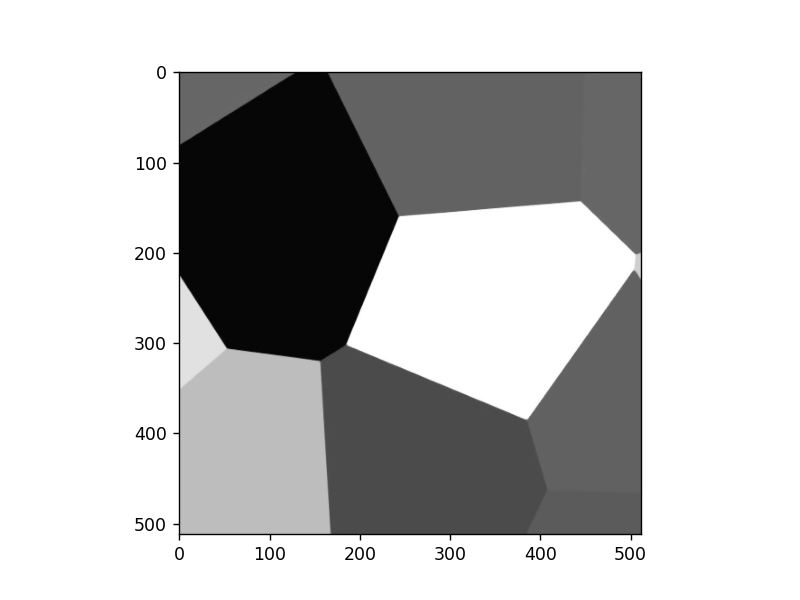

In [8]:

import matplotlib.pyplot as plt

dataset=training_images #select dataset from where to print an image
index=0 #select index of the image belonging to the selected dataset

%matplotlib notebook
plt.imshow(dataset[index,:,:], cmap= "Greys")

# STEP 3: SELECT THE ELASTIC CONSTANT TO PREDICT WITH THE ANN

Select between:
- Young's modulus along axis 1, E1
- Young's modulus along axis 2, E2
- Poisson's ratio that corresponds to a contraction in direction 2 when an extension is applied in direction 1, n12
- Poisson's ratio that corresponds to a contraction in direction 1 when an extension is applied in direction 2, n21
- Shear modulus in direction 2 (1) on the plane whose normal is in direction 1 (2), G12 = G21 = G

In [84]:

training_labels= training_labels_E1 #SELECT ONE : training_labels_E1, training_labels_E2,training_labels_n12,training_labels_n21,training_labels_G
val_labels= val_labels_E1 #SELECT ONE IN CORRESPONDANCE TO THE TRAINING DATA : val_labels_E1, val_labels_E2,val_labels_n12,val_labels_n21,val_labels_G


# STEP 4: CREATE THE ANN ARCHITECTURE
##  4.1. Import feature extractor

### Some available feature extractor networks from Keras Applications
https://keras.io/api/applications/



##  4.2. Add aditional layers on top


# STEP 5: COMPILE THE MODEL
## 5.1 Select Loss function
## 5.2 Select Optimizer and associated parameters

# STEP 6: TRAIN THE MODEL
##  6.1. Implement callback functions to monitor validation loss and save best weights
##  6.2. Train the model for the selected number of epochs and batch size

# STEP 7: VISUALIZE THE EVOLUTION OF THE TRAINING 
##  7.1. Loss vs Epoch Plot 


# STEP 8: EVALUATE THE PERFORMANCE OF THE TRAINED THE MODEL
##  8.1. Make predicitons on Training and Validation datasets. Determine coefficient of determination and compute the error associated to the statistical indicators 
##  8.2. Make predicitons on Test dataset. Determine coefficient of determination and compute the error associated to the statistical indicators 
##  8.3. Generate a Parity Plot summarizing the performance on each dataset
